In [77]:
import numpy as np
import math
import random

# this script is used to generate a set of random data points for classification problems. 


def getDataSet():
    """
    Returns X (250 X 2) and Y (250 X 1)
    """
    # Step 1: Generate data by a module
    n = 100  # 1st class contains N objects
    alpha = 1.5  # 2st class contains alpha*N ones
    sig2 = 1  # assume 2nd class has the same variance as the 1st
    dist2 = 4

    # later we move this piece of code in a separate file
    # [X, y] = loadModelData(N, alpha, sig2, dist2);
    n2 = math.floor(alpha * n)  # calculate the size of the 2nd class
    cls1X = np.random.randn(n, 2)  # generate random objects of the 1st class

    # generate a random distance from the center of the 1st class to the center of the 2nd
    # https://stackoverflow.com/questions/1721802/what-is-the-equivalent-of-matlabs-repmat-in-numpy
    a = np.array([[math.sin(math.pi * random.random()), math.cos(math.pi * random.random())]])
    a1 = a * dist2
    shiftClass2 = np.kron(np.ones((n2, 1)), a1)

    # generate random objects of the 2nd class
    cls2X = sig2 * np.random.randn(n2, 2) + shiftClass2
    # combine the objects
    X = np.concatenate((cls1X, cls2X), axis=0)

    # assign class labels: 0s and 1s
    y = np.concatenate((np.zeros((cls1X.shape[0], 1)), np.ones((cls2X.shape[0], 1))), axis=0)
    # end % of module.
    return X, y

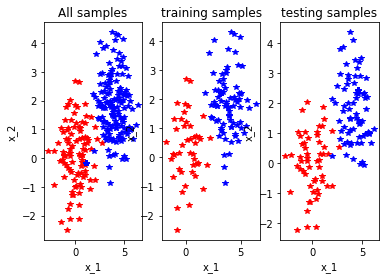

average error: 0.3466666666666667 (0.47590848793532653)


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from getDataset import getDataSet
from sklearn.linear_model import LogisticRegression
from random import shuffle
from numpy import loadtxt, where

# Starting codes

# Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# step 1: generate dataset that includes both positive and negative samples,
# where each sample is described with two features.
# 250 samples in total.

[X, y] = getDataSet()  # note that y contains only 1s and 0s,

# create figure for all charts to be placed on so can be viewed together
fig = plt.figure()


def func_DisplayData(dataSamplesX, dataSamplesY, chartNum, titleMessage):
    idx1 = (dataSamplesY == 0).nonzero()  # object indices for the 1st class
    idx2 = (dataSamplesY == 1).nonzero()
    ax = fig.add_subplot(1, 3, chartNum)
    # no more variables are needed
    plt.plot(dataSamplesX[idx1, 0], dataSamplesX[idx1, 1], 'r*')
    plt.plot(dataSamplesX[idx2, 0], dataSamplesX[idx2, 1], 'b*')
    # axis tight
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_title(titleMessage)


# plotting all samples

func_DisplayData(X, y, 1, 'All samples')

# number of training samples
nTrain = 120


######################PLACEHOLDER 1#start#########################
# write you own code to randomly pick up nTrain number of samples for training and use the rest for testing. 

maxIndex = len(X)
indices = list(range(maxIndex)) #creates a list of number
np.random.shuffle(indices)      #shuffles data, this will be use to randombly split the data between training and testing
split = int(maxIndex/2)


trainX =  X[indices[:split]]  #  training samples
trainY =  y[indices[:split]]

testX =   X[indices[split:]] # testing samples               
testY =   y[indices[split:]]# labels of testing samples     nTest X 1

####################PLACEHOLDER 1#end#########################

# plot the samples you have pickup for training, check to confirm that both negative
# and positive samples are included.
func_DisplayData(trainX, trainY, 2, 'training samples')
func_DisplayData(testX, testY, 3, 'testing samples')

# show all charts
plt.show()

######################PLACEHOLDER2 #start#########################
# in this placefolder you will need to train a logistic model using the training data: trainX, and trainY.
# please delete these coding lines and use the sample codes provided in the folder "codeLogit"
# use sklearn class
logReg = LogisticRegression(fit_intercept=True, C=1e15) # create a model
logReg.fit(trainX, np.ravel(trainY))# training
coeffs = logReg.coef_ # coefficients
intercept = logReg.intercept_ # bias 
bHat = np.hstack((np.array([intercept]), coeffs))# model parameters

######################PLACEHOLDER2 #end #########################


######################PLACEHOLDER3 #start#########################
# codes for making prediction, 
# with the learned model, apply the logistic model over testing samples
# hatProb is the probability of belonging to the class 1.
# y = 1/(1+exp(-Xb))
# yHat = 1./(1+exp( -[ones( size(X,1),1 ), X] * bHat )); ));
# WARNING: please DELETE THE FOLLOWING CODEING LINES and write your own codes for making predictions
xHat = np.concatenate((np.ones((testX.shape[0], 1)), testX), axis=1)  # add column of 1s to left most  ->  130 X 3
negXHat = np.negative(xHat)  # -1 multiplied by matrix -> still 130 X 3
hatProb = 1.0 / (1.0 + np.exp(negXHat * bHat))  # variant of classification   -> 130 X 3
# predict the class labels with a threshold
yHat = (hatProb >= 0.5).astype(int)  # convert bool (True/False) to int (1/0)
#PLACEHOLDER#end

######################PLACEHOLDER 3 #end #########################


# step 4: evaluation
# compare predictions yHat and and true labels testy to calculate average error and standard deviation
testYDiff = np.abs(yHat - testY)
avgErr = np.mean(testYDiff)
stdErr = np.std(testYDiff)

print('average error: {} ({})'.format(avgErr, stdErr))